Retrieve daily data from

https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

Resample daily table to weekly table. Compare the result to the weekly table shown on the webpage. Are they the same?


In [78]:
import datetime
import os
import numpy as np
import pandas as pd

#### Data retrieval from yahoo finance

In [79]:
pip install pandas-datareader --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import pandas_datareader as pdr
pdr.__version__

'0.10.0'

In [81]:
# retrieve data from yahoo finance
tickers = ['BTC-USD']
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2020, 12, 2)

df = pdr.get_data_yahoo(tickers, start=start_date, end=end_date)
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2018-01-01,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


In [82]:
df = df.droplevel('Symbols', axis='columns')
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-01,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


In [83]:
df = df.rename_axis(None, axis=1)
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-01,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


In [84]:
df = df.reset_index()
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2018-01-01,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
1,2018-01-02,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2,2018-01-03,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
3,2018-01-04,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
4,2018-01-05,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


#### Data retrieval from csv file

In [85]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/Pandas/Exercises/BTC_resample/BTC-USD_daily.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
732,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
733,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
734,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
735,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
736,2022-01-06,43429.031250,43745.097656,42645.539063,42992.074219,42992.074219,40913682432


In [86]:
# retrieve weekly data from csv file
df_weekly = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/Pandas/Exercises/BTC_resample/BTC-USD_weekly.csv')
df_weekly.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
102,2021-12-15,48379.753906,49473.957031,45579.808594,48936.613281,48936.613281,205982757404
103,2021-12-22,48937.097656,51956.328125,47414.210938,47588.855469,47588.855469,174789516376
104,2021-12-29,47623.871094,48472.527344,45752.464844,45897.574219,45897.574219,221810432535
105,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
106,2022-01-06,43429.031250,43745.097656,42645.539063,42971.894531,42971.894531,44911583232


#### Resampling


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

In [87]:
# Column date must have date format
df['Date'] = pd.to_datetime(df['Date'])

In [88]:
df = df.resample('W', on = 'Date')\
       .agg({'Open': 'first', 'High': 'max', 'Low': 'min' , 'Close': 'last', 'Adj Close': 'last','Volume': 'sum'})\
       .reset_index()
 # 'W' --> 'W-SUN'
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
101,2021-12-12,49413.480469,51934.781250,46942.347656,50098.335938,50098.335938,208148497532
102,2021-12-19,50114.742188,50205.000000,45598.441406,46707.015625,46707.015625,214770398202
103,2021-12-26,46707.062500,51814.027344,45579.808594,50809.515625,50809.515625,175052499792
104,2022-01-02,50802.609375,51956.328125,45819.953125,47345.218750,47345.218750,203998848909
105,2022-01-09,47343.542969,47510.726563,42645.539063,42992.074219,42992.074219,153331073558


#### Solution


*   resample day --> week (W-TUE)
*   shift -6 day

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [89]:
# Column date must have date format
df['Date'] = pd.to_datetime(df['Date'])

In [90]:
df = df.resample('W-TUE', on = 'Date')\
       .agg({'Open': 'first', 'High': 'max', 'Low': 'min' , 'Close': 'last', 'Adj Close': 'last','Volume': 'sum'})\
       .reset_index()
 # 'W' --> 'W-SUN'
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
101,2021-12-14,49413.480469,51934.781250,46942.347656,50098.335938,50098.335938,208148497532
102,2021-12-21,50114.742188,50205.000000,45598.441406,46707.015625,46707.015625,214770398202
103,2021-12-28,46707.062500,51814.027344,45579.808594,50809.515625,50809.515625,175052499792
104,2022-01-04,50802.609375,51956.328125,45819.953125,47345.218750,47345.218750,203998848909
105,2022-01-11,47343.542969,47510.726563,42645.539063,42992.074219,42992.074219,153331073558


In [91]:
df['Date'] = df['Date'] + pd.Timedelta(value=-6, unit='D')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
101,2021-12-08,49413.480469,51934.781250,46942.347656,50098.335938,50098.335938,208148497532
102,2021-12-15,50114.742188,50205.000000,45598.441406,46707.015625,46707.015625,214770398202
103,2021-12-22,46707.062500,51814.027344,45579.808594,50809.515625,50809.515625,175052499792
104,2021-12-29,50802.609375,51956.328125,45819.953125,47345.218750,47345.218750,203998848909
105,2022-01-05,47343.542969,47510.726563,42645.539063,42992.074219,42992.074219,153331073558


In [92]:
# retrieve weekly data from csv file
df_weekly = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/Pandas/Exercises/BTC_resample/BTC-USD_weekly.csv')
df_weekly.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
102,2021-12-15,48379.753906,49473.957031,45579.808594,48936.613281,48936.613281,205982757404
103,2021-12-22,48937.097656,51956.328125,47414.210938,47588.855469,47588.855469,174789516376
104,2021-12-29,47623.871094,48472.527344,45752.464844,45897.574219,45897.574219,221810432535
105,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
106,2022-01-06,43429.031250,43745.097656,42645.539063,42971.894531,42971.894531,44911583232


#### Plotting

In [93]:
import matplotlib.pyplot as plt

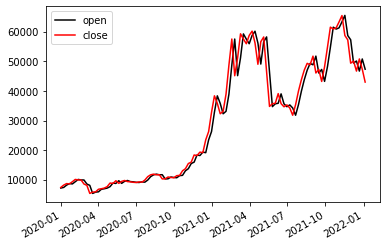

In [94]:
fig, ax = plt.subplots()
plt.plot(pd.to_datetime(df['Date']), df['Open'], marker='', linestyle='-', color = 'black', label = 'open')
plt.plot(pd.to_datetime(df['Date']), df['Close'], marker='', linestyle='-', color = 'red', label = 'close')

fig.autofmt_xdate() # per distanziare automaticamente le date

plt.legend()
plt.show()